<a href="https://www.kaggle.com/code/madisrinija/goodreads-dataset-eda?scriptVersionId=286192444" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install protobuf==3.20.3 --force-reinstall
!pip install transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.33.0
    Uninstalling protobuf-6.33.0:
      Successfully uninstalled protobuf-6.33.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
opentelemetry-proto 1.37.0 requires protobuf<7.0,>=5.0, but you have protobuf 3.20.3 which is incompatible.
onnx 1.18.0 requires protobuf>=4.25.1, but you have protobuf 3.20.3 which is incompatible.
a2a-sdk 0.3.10 requires protobuf>=5.29.5, but you have protobuf 3.20.3 which is incompatible.
ray 2.51.1 requires click!=8.3.0,>=7.0, but you have click 8.3.0 which is incompatible.
bigframes 2.12.0 requires rich<14,>=12.4.4, but you have rich 14.2.0 which is incompatible.
tensorflow-me

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from transformers import pipeline
import nltk
from tqdm import tqdm

2025-12-14 17:57:49.451873: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765735069.844421      20 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765735070.002641      20 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
details = pd.read_csv("/kaggle/input/goodreads-dataset-cleaning/details.csv")
reviews = pd.read_csv("/kaggle/input/goodreads-dataset-cleaning/reviews.csv")

In [4]:
details.head()

,Unnamed: 0,book_id,cover_image_uri,book_title,book_details,format,publication_info,authorlink,author,num_pages,...,average_rating,rating_distribution,pages,book_format,publication_date,rating_5,rating_4,rating_3,rating_2,rating_1
0,0,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...","652 pages, Paperback","July 16, 2005",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,652.0,...,4.58,"{'5': 2244154, '4': 775028, '3': 219864, '2': ...",652.0,Paperback,2005-07-16,2244154,775028,219864,35870,17600
1,1,2,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Order of the Phoenix,Harry Potter is about to start his fifth year ...,"912 pages, Paperback","June 21, 2003",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,912.0,...,4.50,"{'5': 2178760, '4': 856178, '3': 293293, '2': ...",912.0,Paperback,2003-06-21,2178760,856178,293293,51763,21715
2,2,3,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Sorcerer's Stone,Harry Potter has no idea how famous he is. Tha...,"309 pages, Hardcover","June 26, 1997",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,309.0,...,4.47,"{'5': 6544542, '4': 2348390, '3': 856996, '2':...",309.0,Hardcover,1997-06-26,6544542,2348390,856996,194791,171528
3,3,5,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Prisoner of Azkaban,"Harry Potter, along with his best friends, Ron...","435 pages, Mass Market Paperback","July 8, 1999",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,435.0,...,4.58,"{'5': 2892322, '4': 970190, '3': 287733, '2': ...",435.0,Mass Market Paperback,1999-07-08,2892322,970190,287733,40587,24199
4,4,6,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Goblet of Fire,It is the summer holidays and soon Harry Potte...,"734 pages, Paperback","July 8, 2000",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,734.0,...,4.57,"{'5': 2500070, '4': 899496, '3': 259745, '2': ...",734.0,Paperback,2000-07-08,2500070,899496,259745,38301,20597


In [5]:
reviews.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,book_id,reviewer_id,reviewer_name,likes_on_review,review_content,reviewer_followers,reviewer_total_reviews,review_date,review_rating
0,57094644,114413220,Sofia,582.0,thought done writing book rick strike,7961.0,234.0,2021-02-24,NaN
1,57094644,48328025,megs_bookrack,329.0,would shocked told first book ever read fabulo...,12100.0,1802.0,2024-03-17,5.0
2,57094644,6728955,Mariah,232.0,youre telling anaisnta daughter poseidonseems ...,490.0,1263.0,2022-09-05,3.0
3,57094644,101179363,ale (semi hiatus) ‧ ₊˚୨ ♡ ୧ ₊˚,218.0,insert vine anything beyoncéupdatewait cover,2709.0,458.0,2021-06-03,NaN
4,2948832,48727754,chan ☆,174.0,excited one since well set first book unfortun...,55100.0,1139.0,2021-06-09,2.0


In [6]:
details.shape

(16225, 23)

In [7]:
reviews.shape

(63014, 9)

In [8]:
details['book_id'] = details['book_id'].astype(int)
reviews['book_id'] = reviews['book_id'].astype(int)

In [9]:
merged = pd.merge(details, reviews, on='book_id', how='inner')

In [10]:
merged = merged.rename(columns={'Unnamed: 0':'id'})
merged['id'] = pd.Series(range(merged.shape[0]))+1

In [11]:
merged.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,id,book_id,cover_image_uri,book_title,book_details,format,publication_info,authorlink,author,num_pages,...,rating_2,rating_1,reviewer_id,reviewer_name,likes_on_review,review_content,reviewer_followers,reviewer_total_reviews,review_date,review_rating
0,1,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...","652 pages, Paperback","July 16, 2005",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,652.0,...,35870,17600,22106879,Jayson,653.0,extraordinarynotesa relationshippy respite it’...,3632.0,2262.0,2024-03-11,5.0
1,2,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...","652 pages, Paperback","July 16, 2005",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,652.0,...,35870,17600,22106879,Jayson,880.0,extraordinarynotesit dwells delightfully munda...,3632.0,2262.0,2022-03-13,5.0
2,3,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...","652 pages, Paperback","July 16, 2005",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,652.0,...,35870,17600,14457130,Whitney Atkinson,NaN,dont want talk anyonedont even look mei expect...,12800.0,985.0,2015-05-26,5.0
3,4,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...","652 pages, Paperback","July 16, 2005",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,652.0,...,35870,17600,30728719,❀ Lily ❀,462.0,holy shit im sort right nowvideo review,16000.0,81.0,2019-09-25,NaN
4,5,2,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Order of the Phoenix,Harry Potter is about to start his fifth year ...,"912 pages, Paperback","June 21, 2003",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,912.0,...,51763,21715,22106879,Jayson,671.0,extraordinarynotesan angsty apprehension tome ...,3632.0,2262.0,2024-03-11,5.0


#### Top 10 Most Reviewed Books

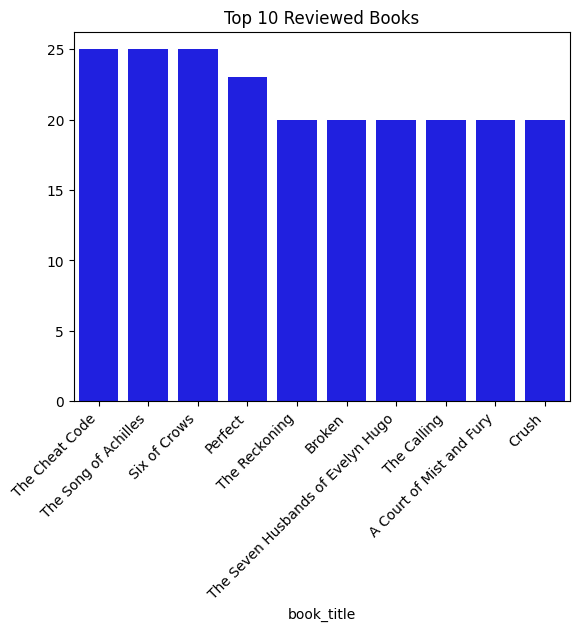

In [12]:
top_books = merged['book_title'].value_counts().head(10)
sns.barplot(x=top_books.index, y=top_books.values,color='blue')
plt.xticks(rotation=45,ha="right")
plt.title("Top 10 Reviewed Books")
plt.show()

#### Most Common Words in Reviews

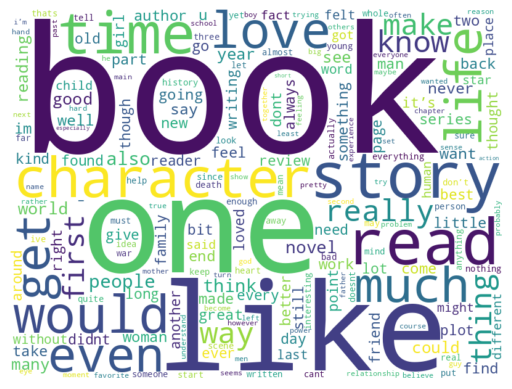

In [13]:
all_words = " ".join(merged['review_content'].dropna()).split()
word_count = Counter(all_words)
word_count = dict(word_count.most_common())

wc = WordCloud(width=800, height=600,background_color='white').generate_from_frequencies(word_count)
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


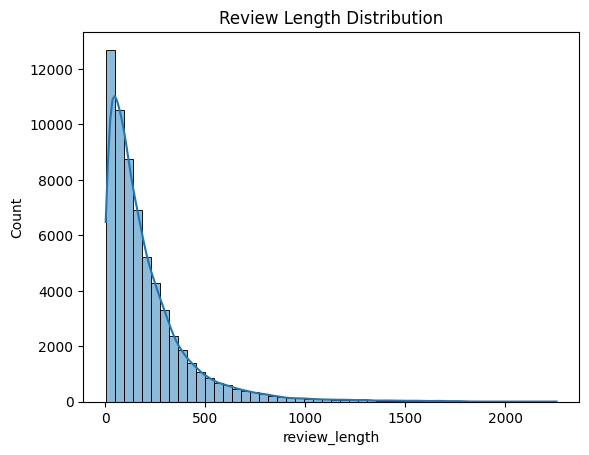

In [14]:
merged['review_length'] = merged['review_content'].str.split().str.len()
sns.histplot(merged['review_length'],bins=50,kde=True)
plt.title("Review Length Distribution")
plt.show()

In [15]:
'''classifier = pipeline(
    task="sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english"
)

sentiment = merged['review_content'].apply(lambda x:classifier(str(x)[:512]))'''

'classifier = pipeline(\n    task="sentiment-analysis",\n    model="distilbert-base-uncased-finetuned-sst-2-english"\n)\n\nsentiment = merged[\'review_content\'].apply(lambda x:classifier(str(x)[:512]))'

In [16]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [17]:
sia = SentimentIntensityAnalyzer()
merged['review_content'] = merged['review_content'].fillna("")
merged['sentiment_score'] = merged['review_content'].apply(lambda x: sia.polarity_scores(x))
merged['sentiment_score'] = merged['sentiment_score'].apply(lambda x: x['compound'])

In [18]:
res  = {}
for i,row in tqdm(merged.iterrows() , total=len(merged)):
    text = row['review_content']
    myid = row['id']
    res[myid] = sia.polarity_scores(text)

100%|██████████| 63310/63310 [02:25<00:00, 435.96it/s]


In [19]:
vanders = pd.DataFrame(res).T
vanders = vanders.reset_index().rename(columns={'index':'id'})

In [20]:
df = pd.merge(merged,vanders,how='left',on='id')

In [21]:
def label_sentiment(score):
  if score >= 0.05:
    return 'Positive'
  elif score <= -0.05:
    return 'Negative'
  else:
    return 'Neutral'

df['sentiment'] = df['compound'].apply(label_sentiment)

In [22]:
#grouped_sentiment = merged

In [23]:
df.columns

Index(['id', 'book_id', 'cover_image_uri', 'book_title', 'book_details',
       'format', 'publication_info', 'authorlink', 'author', 'num_pages',
       'genres', 'num_ratings', 'num_reviews', 'average_rating',
       'rating_distribution', 'pages', 'book_format', 'publication_date',
       'rating_5', 'rating_4', 'rating_3', 'rating_2', 'rating_1',
       'reviewer_id', 'reviewer_name', 'likes_on_review', 'review_content',
       'reviewer_followers', 'reviewer_total_reviews', 'review_date',
       'review_rating', 'review_length', 'sentiment_score', 'neg', 'neu',
       'pos', 'compound', 'sentiment'],
      dtype='object')

In [24]:
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,id,book_id,cover_image_uri,book_title,book_details,format,publication_info,authorlink,author,num_pages,...,reviewer_total_reviews,review_date,review_rating,review_length,sentiment_score,neg,neu,pos,compound,sentiment
0,1,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...","652 pages, Paperback","July 16, 2005",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,652.0,...,2262.0,2024-03-11,5.0,1199.0,0.9954,0.154,0.657,0.189,0.9954,Positive
1,2,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...","652 pages, Paperback","July 16, 2005",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,652.0,...,2262.0,2022-03-13,5.0,12.0,0.5574,0.074,0.676,0.250,0.5574,Positive
2,3,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...","652 pages, Paperback","July 16, 2005",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,652.0,...,985.0,2015-05-26,5.0,12.0,-0.0829,0.249,0.587,0.163,-0.0829,Negative
3,4,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...","652 pages, Paperback","July 16, 2005",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,652.0,...,81.0,2019-09-25,NaN,7.0,-0.5574,0.375,0.625,0.000,-0.5574,Negative
4,5,2,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Order of the Phoenix,Harry Potter is about to start his fifth year ...,"912 pages, Paperback","June 21, 2003",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,912.0,...,2262.0,2024-03-11,5.0,1211.0,0.9838,0.127,0.717,0.156,0.9838,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63305,63306,209607645,https://images-na.ssl-images-amazon.com/images...,Shadow's Siege,Shadow Island is under siege.Just a few short ...,"254 pages, Kindle Edition","April 25, 2024",https://www.goodreads.com/author/show/19007338...,Mary Stone,254.0,...,234.0,2024-04-24,5.0,48.0,0.9606,0.000,0.684,0.316,0.9606,Positive
63306,63307,209607645,https://images-na.ssl-images-amazon.com/images...,Shadow's Siege,Shadow Island is under siege.Just a few short ...,"254 pages, Kindle Edition","April 25, 2024",https://www.goodreads.com/author/show/19007338...,Mary Stone,254.0,...,1032.0,2024-04-24,5.0,85.0,0.9042,0.056,0.764,0.180,0.9042,Positive
63307,63308,209607645,https://images-na.ssl-images-amazon.com/images...,Shadow's Siege,Shadow Island is under siege.Just a few short ...,"254 pages, Kindle Edition","April 25, 2024",https://www.goodreads.com/author/show/19007338...,Mary Stone,254.0,...,103.0,2024-04-26,5.0,66.0,-0.9801,0.373,0.531,0.096,-0.9801,Negative
63308,63309,209607645,https://images-na.ssl-images-amazon.com/images...,Shadow's Siege,Shadow Island is under siege.Just a few short ...,"254 pages, Kindle Edition","April 25, 2024",https://www.goodreads.com/author/show/19007338...,Mary Stone,254.0,...,175.0,2024-04-30,5.0,69.0,-0.9803,0.346,0.569,0.085,-0.9803,Negative


In [25]:
merged.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,id,book_id,cover_image_uri,book_title,book_details,format,publication_info,authorlink,author,num_pages,...,reviewer_id,reviewer_name,likes_on_review,review_content,reviewer_followers,reviewer_total_reviews,review_date,review_rating,review_length,sentiment_score
0,1,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...","652 pages, Paperback","July 16, 2005",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,652.0,...,22106879,Jayson,653.0,extraordinarynotesa relationshippy respite it’...,3632.0,2262.0,2024-03-11,5.0,1199.0,0.9954
1,2,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...","652 pages, Paperback","July 16, 2005",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,652.0,...,22106879,Jayson,880.0,extraordinarynotesit dwells delightfully munda...,3632.0,2262.0,2022-03-13,5.0,12.0,0.5574
2,3,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...","652 pages, Paperback","July 16, 2005",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,652.0,...,14457130,Whitney Atkinson,NaN,dont want talk anyonedont even look mei expect...,12800.0,985.0,2015-05-26,5.0,12.0,-0.0829
3,4,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...","652 pages, Paperback","July 16, 2005",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,652.0,...,30728719,❀ Lily ❀,462.0,holy shit im sort right nowvideo review,16000.0,81.0,2019-09-25,NaN,7.0,-0.5574
4,5,2,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Order of the Phoenix,Harry Potter is about to start his fifth year ...,"912 pages, Paperback","June 21, 2003",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,912.0,...,22106879,Jayson,671.0,extraordinarynotesan angsty apprehension tome ...,3632.0,2262.0,2024-03-11,5.0,1211.0,0.9838
